# PRE-PROCESSING

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copy all edf files to same place for easier conversion to ascii
""" source_folder = "/Users/dako/Downloads/VISCOM/all_anti_saccade"  # Change this to your actual source folder path
destination_folder = "/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_edf"  # Change this to your actual destination folder path

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Iterate over subfolders and copy .edf files
for root, _, files in os.walk(source_folder):
    for file in files:
        if file.endswith(".EDF"):
            source_file = os.path.join(root, file)
            destination_file = os.path.join(destination_folder, file)
            
            # Ensure unique filenames if multiple subfolders have same file name
            if os.path.exists(destination_file):
                filename, ext = os.path.splitext(file)
                counter = 1
                while os.path.exists(os.path.join(destination_folder, f"{filename}_{counter}{ext}")):
                    counter += 1
                destination_file = os.path.join(destination_folder, f"{filename}_{counter}{ext}")

            shutil.copy2(source_file, destination_file)  # Preserve metadata
            print(f"Copied: {source_file} -> {destination_file}")

print("All .edf files have been copied successfully.") """

' source_folder = "/Users/dako/Downloads/VISCOM/all_anti_saccade"  # Change this to your actual source folder path\ndestination_folder = "/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_edf"  # Change this to your actual destination folder path\n\n# Ensure the destination folder exists\nos.makedirs(destination_folder, exist_ok=True)\n\n# Iterate over subfolders and copy .edf files\nfor root, _, files in os.walk(source_folder):\n    for file in files:\n        if file.endswith(".EDF"):\n            source_file = os.path.join(root, file)\n            destination_file = os.path.join(destination_folder, file)\n            \n            # Ensure unique filenames if multiple subfolders have same file name\n            if os.path.exists(destination_file):\n                filename, ext = os.path.splitext(file)\n                counter = 1\n                while os.path.exists(os.path.join(destination_folder, f"{filename}_{counter}{ext}")):\n                    counter += 1\n    

In [2]:
# Load the participant info Excel file
file_path = "/Users/dako/Downloads/VISCOM/info (1).xlsx" 
df = pd.read_excel(file_path)

In [3]:
# Define the directory containing ASC files
asc_directory = "/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_edf" 

# List all ASC files in the directory
asc_files = [f for f in os.listdir(asc_directory) if f.endswith('.asc')]

# Display the files to confirm
print("Files to process:", asc_files)

Files to process: ['anti-saccade_354_0.asc', 'anti-saccade_87_0.asc', 'anti-saccade_231_0.asc', 'anti-saccade_188_0.asc', 'anti-saccade_308_1.asc', 'anti-saccade_289_0.asc', 'anti-saccade_394_0.asc', 'anti-saccade_151_1.asc', 'anti-saccade_401_0.asc', 'anti-saccade_215_0.asc', 'anti-saccade_250_0.asc', 'anti-saccade_228_0.asc', 'anti-saccade_337_2.asc', 'anti-saccade_372_0.asc', 'anti-saccade_290_2.asc', 'anti-saccade_252_0.asc', 'anti-saccade_376_4.asc', 'anti-saccade_153_0.asc', 'anti-saccade_403_0.asc', 'anti-saccade_396_0.asc', 'anti-saccade_217_1.asc', 'anti-saccade_356_0.asc', 'anti-saccade_392_0.asc', 'anti-saccade_272_0.asc', 'anti-saccade_173_0.asc', 'anti-saccade_317_0.asc', 'anti-saccade_109_2.asc', 'anti-saccade_197_0.asc', 'anti-saccade_333_0.asc', 'anti-saccade_237_1.asc', 'anti-saccade_157_0.asc', 'anti-saccade_256_0.asc', 'anti-saccade_390_1.asc', 'anti-saccade_328_1.asc', 'anti-saccade_294_0.asc', 'anti-saccade_315_1.asc', 'anti-saccade_195_0.asc', 'anti-saccade_331_0.

In [5]:
import pandas as pd
import os

def process_file_trials(file_path):
    """
    Process a single ASC file to extract trial events.
    """
    participant_id = int(os.path.basename(file_path).split("_")[1])  # Extract participant ID from filename

    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Initialize variables
    events = []
    current_trial_id = None  # Keep track of the current trial ID
    special_participants = {87, 89, 93, 96, 103, 105, 109, 117, 118, 119, 120, 127, 128, 141}

    # Parse the lines
    for line in lines:
        line = line.strip()

        # Detect trial start marked by "TRIALID"
        if "TRIALID" in line:
            current_trial_id = int(line.split()[-1])  # Update current trial ID
            time = int(line.split()[1])  # Extract time
            events.append({"participant_id": participant_id, "trial_id": current_trial_id, "time": time, "event": "TRIALID", "colour": None, "coordinates": None})

        # Detect START line, marking the beginning of the trial
        elif line.startswith("START"):
            time = int(line.split()[1])  # Extract time
            events.append({"participant_id": participant_id, "trial_id": current_trial_id, "time": time, "event": "START", "colour": None, "coordinates": None})

        # Detect END line, marking the end of the trial
        elif line.startswith("END"):
            time = int(line.split()[1])  # Extract time
            events.append({"participant_id": participant_id, "trial_id": current_trial_id, "time": time, "event": "END", "colour": None, "coordinates": None})

        # Detect "!V TRIAL_VAR_DATA"
        elif "!V TRIAL_VAR_DATA" in line:
            time = int(line.split()[1])  # Extract time
            stimulus_onset_s = float(line.split()[-1])  # Last number as stimulus onset in seconds
            stimulus_onset_ms = int(stimulus_onset_s * 1000)  # Convert to ms
            coordinates = " ".join(line.split()[4:5])  # Extract coordinates (e.g., "left", "right")
            events.append({"participant_id": participant_id, "trial_id": current_trial_id, "time": time, "event": "TRIAL_VAR_DATA", "colour": None, "coordinates": coordinates, "stimulus_onset_ms": stimulus_onset_ms})

        # Detect "FIXPOINT" messages
        elif "FIXPOINT" in line:
            time = int(line.split()[1])  # Extract time
            parts = line.split()
            colour = " ".join(parts[4:7])  # Extract first 3 numbers after FIXPOINT
            coordinates = " ".join(parts[10:12])  # Extract coordinates (assume indices 10 and 11 for X, Y)
            events.append({"participant_id": participant_id, "trial_id": current_trial_id, "time": time, "event": "FIXPOINT", "colour": colour, "coordinates": coordinates})

    # Convert events to a DataFrame
    events_df = pd.DataFrame(events)

    # Add stimulus onset events
    stimulus_onset_events = []
    fixpoint_red_df = events_df[(events_df["event"] == "FIXPOINT") & (events_df["colour"] == "255 0 0")]

    for _, row in fixpoint_red_df.iterrows():
        trial_id = row["trial_id"]

        if participant_id in special_participants:
            stimulus_onset_time = row["time"] - 2  # Special calculation
        else:
            fixpoint_white_row = events_df[
                (events_df["trial_id"] == trial_id) &
                (events_df["event"] == "FIXPOINT") &
                (events_df["colour"] == "255 255 255")
            ]
            if not fixpoint_white_row.empty:
                fixpoint_white_time = int(fixpoint_white_row.iloc[0]["time"])
                stimulus_onset_row = events_df[
                    (events_df["trial_id"] == trial_id) &
                    (events_df["event"].str.startswith("TRIAL_VAR_DATA"))
                ]
                if not stimulus_onset_row.empty:
                    stimulus_onset_ms = int(stimulus_onset_row.iloc[0]["stimulus_onset_ms"])
                    stimulus_onset_time = fixpoint_white_time + stimulus_onset_ms

        stimulus_onset_events.append({
            "participant_id": participant_id,
            "trial_id": trial_id,
            "time": stimulus_onset_time,
            "event": "stimulus_onset",
            "colour": row["colour"],
            "coordinates": row["coordinates"]
        })

    # Append stimulus onset events
    events_df = pd.concat([events_df, pd.DataFrame(stimulus_onset_events)], ignore_index=True)
    events_df = events_df.sort_values(by=["participant_id", "trial_id", "time"]).reset_index(drop=True)

    return events_df

# Process multiple files
data_directory = '/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_edf'  # Replace with your directory path
all_files = [os.path.join(data_directory, f) for f in os.listdir(data_directory) if f.endswith('.asc')]

combined_df = pd.DataFrame()

for file_path in all_files:
    events_df = process_file_trials(file_path)
    combined_df = pd.concat([combined_df, events_df], ignore_index=True)

# Save combined DataFrame
# combined_df.to_csv("anti_saccades_all_trials_control.csv", index=False)

trial_data = combined_df

In [6]:
print(trial_data.to_string())

       participant_id  trial_id      time           event       colour coordinates  stimulus_onset_ms
0                 354       0.0   5887241         TRIALID         None        None                NaN
1                 354       0.0   5887259           START         None        None                NaN
2                 354       0.0   5887293        FIXPOINT  255 255 255     960 540                NaN
3                 354       0.0   5889989  stimulus_onset      255 0 0     629 540                NaN
4                 354       0.0   5890991        FIXPOINT      255 0 0     629 540                NaN
5                 354       0.0   5890992  TRIAL_VAR_DATA         None        left             2696.0
6                 354       0.0   5891096             END         None        None                NaN
7                 354       1.0   5892470         TRIALID         None        None                NaN
8                 354       1.0   5892486           START         None        None

In [7]:
# Define the directory containing ASC files
asc_directory = '/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_edf' 

# List all ASC files in the directory
asc_files = [f for f in os.listdir(asc_directory) if f.endswith('.asc')]

# Display the files to confirm
print("Files to process:", asc_files)

Files to process: ['anti-saccade_354_0.asc', 'anti-saccade_87_0.asc', 'anti-saccade_231_0.asc', 'anti-saccade_188_0.asc', 'anti-saccade_308_1.asc', 'anti-saccade_289_0.asc', 'anti-saccade_394_0.asc', 'anti-saccade_151_1.asc', 'anti-saccade_401_0.asc', 'anti-saccade_215_0.asc', 'anti-saccade_250_0.asc', 'anti-saccade_228_0.asc', 'anti-saccade_337_2.asc', 'anti-saccade_372_0.asc', 'anti-saccade_290_2.asc', 'anti-saccade_252_0.asc', 'anti-saccade_376_4.asc', 'anti-saccade_153_0.asc', 'anti-saccade_403_0.asc', 'anti-saccade_396_0.asc', 'anti-saccade_217_1.asc', 'anti-saccade_356_0.asc', 'anti-saccade_392_0.asc', 'anti-saccade_272_0.asc', 'anti-saccade_173_0.asc', 'anti-saccade_317_0.asc', 'anti-saccade_109_2.asc', 'anti-saccade_197_0.asc', 'anti-saccade_333_0.asc', 'anti-saccade_237_1.asc', 'anti-saccade_157_0.asc', 'anti-saccade_256_0.asc', 'anti-saccade_390_1.asc', 'anti-saccade_328_1.asc', 'anti-saccade_294_0.asc', 'anti-saccade_315_1.asc', 'anti-saccade_195_0.asc', 'anti-saccade_331_0.

In [8]:
def parse_metadata(filename):
    """
    Extract metadata (e.g., participant ID, condition) from a filename.
    Assumes filename structure: participantID_condition_XXX.asc.
    """
    # Remove the file extension
    base = os.path.splitext(filename)[0]
    
    # Split the base name into components (assuming underscores separate variables)
    parts = base.split('_')
    
    # Adjust indices according to your naming convention
    participant_id = parts[1]
    condition = parts[0] if len(parts) > 1 else 'unknown'
    
    return participant_id, condition

# Example usage
for file in asc_files:
    pid, cond = parse_metadata(file)
    print(f"File: {file} -> Participant ID: {pid}, Condition: {cond}")

File: anti-saccade_354_0.asc -> Participant ID: 354, Condition: anti-saccade
File: anti-saccade_87_0.asc -> Participant ID: 87, Condition: anti-saccade
File: anti-saccade_231_0.asc -> Participant ID: 231, Condition: anti-saccade
File: anti-saccade_188_0.asc -> Participant ID: 188, Condition: anti-saccade
File: anti-saccade_308_1.asc -> Participant ID: 308, Condition: anti-saccade
File: anti-saccade_289_0.asc -> Participant ID: 289, Condition: anti-saccade
File: anti-saccade_394_0.asc -> Participant ID: 394, Condition: anti-saccade
File: anti-saccade_151_1.asc -> Participant ID: 151, Condition: anti-saccade
File: anti-saccade_401_0.asc -> Participant ID: 401, Condition: anti-saccade
File: anti-saccade_215_0.asc -> Participant ID: 215, Condition: anti-saccade
File: anti-saccade_250_0.asc -> Participant ID: 250, Condition: anti-saccade
File: anti-saccade_228_0.asc -> Participant ID: 228, Condition: anti-saccade
File: anti-saccade_337_2.asc -> Participant ID: 337, Condition: anti-saccade
F

In [9]:
import pandas as pd
import numpy as np

def process_file(file_path, participant_id, condition):
    """
    Process a single ASC file to extract fixations, saccades, and trials,
    including detailed trial event data like stimulus onset.
    Handles malformed lines by filling missing or invalid values with NaN.
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Initialize containers
    fixations = []
    saccades = []
    events = []
    current_trial_id = None  # Keep track of the current trial ID

    # Parse the lines
    for line in lines:
        line = line.strip()

        # Fixations
        if line.startswith("EFIX"):
            parts = line.split()
            fixations.append({
                "trial_id": current_trial_id,
                "eye": parts[1] if len(parts) > 1 else np.nan,
                "start_time": int(parts[2]) if len(parts) > 2 and parts[2].isdigit() else np.nan,
                "end_time": int(parts[3]) if len(parts) > 3 and parts[3].isdigit() else np.nan,
                "duration": int(parts[4]) if len(parts) > 4 and parts[4].isdigit() else np.nan,
                "x": float(parts[5]) if len(parts) > 5 and parts[5].replace('.', '', 1).isdigit() else np.nan,
                "y": float(parts[6]) if len(parts) > 6 and parts[6].replace('.', '', 1).isdigit() else np.nan,
                "avg_pupil_size": float(parts[7]) if len(parts) > 7 and parts[7].replace('.', '', 1).isdigit() else np.nan,
                "participant_id": participant_id,
                "condition": condition,
            })

        # Saccades
        elif line.startswith("ESACC"):
            parts = line.split()
            saccades.append({
                "trial_id": current_trial_id,
                "eye": parts[1] if len(parts) > 1 else np.nan,
                "start_time": int(parts[2]) if len(parts) > 2 and parts[2].isdigit() else np.nan,
                "end_time": int(parts[3]) if len(parts) > 3 and parts[3].isdigit() else np.nan,
                "duration": int(parts[4]) if len(parts) > 4 and parts[4].isdigit() else np.nan,
                "start_x": float(parts[5]) if len(parts) > 5 and parts[5].replace('.', '', 1).isdigit() else np.nan,
                "start_y": float(parts[6]) if len(parts) > 6 and parts[6].replace('.', '', 1).isdigit() else np.nan,
                "end_x": float(parts[7]) if len(parts) > 7 and parts[7].replace('.', '', 1).isdigit() else np.nan,
                "end_y": float(parts[8]) if len(parts) > 8 and parts[8].replace('.', '', 1).isdigit() else np.nan,
                "amplitude": float(parts[9]) if len(parts) > 9 and parts[9].replace('.', '', 1).isdigit() else np.nan,
                "peak_velocity": float(parts[10]) if len(parts) > 10 and parts[10].replace('.', '', 1).isdigit() else np.nan,
                "participant_id": participant_id,
                "condition": condition,
            })

        # Trial events
        elif "TRIALID" in line:
            current_trial_id = int(line.split()[-1])  # Update current trial ID
            time = int(line.split()[1])  # Extract time
            events.append({"trial_id": current_trial_id, "time": time, "event": "TRIALID", "colour": None,  "participant_id": participant_id, "coordinates": None})


    # Convert to DataFrames for fixations and saccades
    fixations_df = pd.DataFrame(fixations)
    saccades_df = pd.DataFrame(saccades)
    events_df = pd.DataFrame(events)
    

    return fixations_df, saccades_df, events_df

In [10]:
import numpy as np

fixations_list = []
saccades_list = []
trials_list = []


for file in asc_files:
    file_path = os.path.join(asc_directory, file)
    participant_id, condition = parse_metadata(file)
    
    fixations_df, saccades_df, events_df = process_file(file_path, participant_id, condition)
    
    fixations_list.append(fixations_df)
    saccades_list.append(saccades_df)
    trials_list.append(events_df)

# Combine all data into single DataFrames
all_fixations = pd.concat(fixations_list, ignore_index=True)
all_saccades = pd.concat(saccades_list, ignore_index=True)
#all_trials = pd.concat(trials_list, ignore_index=True)

In [11]:
print(len(trial_data['participant_id'].unique()))
print(len(all_saccades['participant_id'].unique()))
print(len(all_fixations['participant_id'].unique()))

185
185
185


In [12]:
filtered_fixations = all_fixations[(all_fixations["duration"] >= 110) & (all_fixations["duration"] <= 850)]
filtered_saccades = all_saccades[(all_saccades["duration"] >= 5) & (all_saccades["duration"] <= 100)]
filtered_saccades = filtered_saccades[(filtered_saccades["amplitude"] > 0.4) & (filtered_saccades["peak_velocity"] > 0)]
filtered_saccades["average_velocity"] = filtered_saccades["amplitude"] / filtered_saccades["duration"]*1000

In [13]:
stimulus_onset_df = trial_data[trial_data["event"] == "stimulus_onset"]
# Create the stim_direction column based on the first value in coordinates
stimulus_onset_df["stim_direction"] = stimulus_onset_df["coordinates"].apply(
    lambda coord: "left" if int(coord.split()[0]) < 960 else "right"
)

# Verify the changes
(stimulus_onset_df.reset_index(drop=True))

/var/folders/rd/94hjv6z13s11fzgrxgmvpt3r0000gn/T/ipykernel_74298/3000030456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimulus_onset_df["stim_direction"] = stimulus_onset_df["coordinates"].apply(


,participant_id,trial_id,time,event,colour,coordinates,stimulus_onset_ms,stim_direction
0,354,0.0,5889989,stimulus_onset,255 0 0,629 540,NaN,left
1,354,1.0,5894039,stimulus_onset,255 0 0,1290 540,NaN,right
2,354,2.0,5902424,stimulus_onset,255 0 0,629 540,NaN,left
3,354,3.0,5907410,stimulus_onset,255 0 0,629 540,NaN,left
4,354,4.0,5910630,stimulus_onset,255 0 0,1290 540,NaN,right
...,...,...,...,...,...,...,...,...
2795,200,11.0,1995716,stimulus_onset,255 0 0,629 540,NaN,left
2796,200,12.0,2001901,stimulus_onset,255 0 0,629 540,NaN,left
2797,200,13.0,2007216,stimulus_onset,255 0 0,1290 540,NaN,right
2798,200,14.0,2014341,stimulus_onset,255 0 0,629 540,NaN,left


In [14]:
# Summarize the number of unique trial IDs per participant
trial_summary = stimulus_onset_df.groupby("participant_id")["trial_id"].nunique().reset_index()

# Rename columns for clarity
trial_summary.columns = ["participant_id", "unique_trial_count"]

print(trial_summary.to_string())


     participant_id  unique_trial_count
0                87                   6
1                89                   6
2                93                   6
3                96                   6
4               103                   6
5               105                   6
6               106                  16
7               109                   6
8               111                  16
9               113                   6
10              117                   6
11              118                   6
12              119                   6
13              120                   6
14              121                   6
15              122                   6
16              125                  16
17              127                   6
18              128                   6
19              133                  16
20              134                  16
21              135                  16
22              138                  16
23              141                  16


In [15]:
filtered_fixations = filtered_fixations.dropna(subset=["trial_id"])
filtered_saccades = filtered_saccades.dropna(subset=["trial_id"])

In [16]:
filtered_saccades["participant_id"] = filtered_saccades["participant_id"].astype(int)
filtered_saccades["trial_id"] = filtered_saccades["trial_id"].astype(int)

# Create the saccade_direction column based on the comparison of end_x and start_x
filtered_saccades["saccade_direction"] = filtered_saccades.apply(
    lambda row: "right" if row["end_x"] > row["start_x"] else "left",
    axis=1
)

stimulus_onset_df["participant_id"] = stimulus_onset_df["participant_id"].astype(int)
stimulus_onset_df["trial_id"] = stimulus_onset_df["trial_id"].astype(int)

merged_df = pd.merge(
    filtered_saccades,
    stimulus_onset_df[["participant_id", "trial_id", "time","stim_direction"]],
    on=["participant_id", "trial_id"],
    suffixes=("", "_stimulus")
)

/var/folders/rd/94hjv6z13s11fzgrxgmvpt3r0000gn/T/ipykernel_74298/334489804.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimulus_onset_df["participant_id"] = stimulus_onset_df["participant_id"].astype(int)
/var/folders/rd/94hjv6z13s11fzgrxgmvpt3r0000gn/T/ipykernel_74298/334489804.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimulus_onset_df["trial_id"] = stimulus_onset_df["trial_id"].astype(int)


In [17]:
# Filter for saccades where start_time is greater than stimulus onset time
valid_saccades = merged_df[merged_df["start_time"] >= merged_df["time"]]
valid_saccades = valid_saccades[(valid_saccades["start_time"] - valid_saccades["time"]) >= 40]

# Group by participant and trial, and select the first saccade
reaction_time = valid_saccades.sort_values(by=["participant_id", "trial_id", "start_time"]).groupby(
    ["participant_id", "trial_id"]
).first().reset_index()

# Rename and retain only relevant columns
reaction_time = reaction_time[[
    "participant_id", "trial_id","eye", "start_time", "time", 'start_x', 'end_x', "end_time", "duration", "amplitude", "peak_velocity", "average_velocity","stim_direction","saccade_direction"
]].rename(columns={"time": "stimulus_onset_time", "start_time": "first_saccade_start_time"})

# Add the reaction_time column
reaction_time["reaction_time"] = reaction_time["first_saccade_start_time"] - reaction_time["stimulus_onset_time"]

print(reaction_time.to_string())

      participant_id  trial_id eye  first_saccade_start_time  stimulus_onset_time  start_x   end_x  end_time  duration  amplitude  peak_velocity  average_velocity stim_direction saccade_direction  reaction_time
0                 87         0   R                   4716239              4715829    957.7  1393.5   4716286        47       7.90          312.0        168.085106           left             right            410
1                 87         1   L                   4723498              4723122    949.8   764.4   4723524        26       3.41          254.0        131.153846          right              left            376
2                 87         2   R                   4729931              4729760    991.1  1294.2   4729968        37       5.53          292.0        149.459459          right             right            171
3                 87         3   R                   4740951              4740588    971.6  1321.7   4740997        46       6.38          327.0        138.

In [18]:
# Filter for saccades where start_time is greater than stimulus onset time
# and saccade_direction is not the same as stim_direction
valid_saccades_correct = merged_df[
    (merged_df["start_time"] >= merged_df["time"]) &
    (merged_df["saccade_direction"] != merged_df["stim_direction"])
]
valid_saccades_correct = valid_saccades_correct[(valid_saccades_correct["start_time"] - valid_saccades_correct["time"]) >= 40]

# Group by participant and trial, and select the first saccade
reaction_time_correct = valid_saccades_correct.sort_values(
    by=["participant_id", "trial_id", "start_time"]
).groupby(["participant_id", "trial_id"]).first().reset_index()

# Rename and retain only relevant columns
reaction_time_correct = reaction_time_correct[[
    "participant_id", "trial_id", "start_time", "time", 'start_x', 'end_x', 
    "end_time", "duration", "amplitude", "peak_velocity","average_velocity", "stim_direction", 
    "saccade_direction"
]].rename(columns={"time": "stimulus_onset_time", "start_time": "first_saccade_start_time"})

# Add the reaction_time column
reaction_time_correct["reaction_time"] = reaction_time_correct["first_saccade_start_time"] - reaction_time_correct["stimulus_onset_time"]

In [19]:
filtered_fixations["participant_id"] = filtered_fixations["participant_id"].astype(int)
# Create the 'condition' column in trial_summary by mapping participant_id to Group from df
filtered_fixations['condition'] = filtered_fixations['participant_id'].map(df.set_index('ID')['Group'])
valid_saccades['condition'] = valid_saccades['participant_id'].map(df.set_index('ID')['Group'])
reaction_time['condition'] = reaction_time['participant_id'].map(df.set_index('ID')['Group'])
reaction_time_correct['condition'] = reaction_time_correct['participant_id'].map(df.set_index('ID')['Group'])

In [32]:
reaction_time = reaction_time[(reaction_time["reaction_time"] <= 1500)]
reaction_time_correct = reaction_time_correct[(reaction_time_correct["reaction_time"] <= 1500)]

In [33]:
# Save to CSV or display if needed
reaction_time.to_csv("anti_saccades_all_reaction_times.csv", index=False)
reaction_time_correct.to_csv("anti_saccades_correct_reaction_times.csv", index=False)
filtered_fixations.to_csv("anti_saccades_all_fixations.csv", index=False)
filtered_saccades.to_csv("anti_saccades_all_saccades.csv", index=False)
trial_data.to_csv("anti_saccades_all_trials.csv", index=False)

In [34]:
len(np.unique(valid_saccades['participant_id']))

185

In [35]:
# Count the number of rows where reaction_time is greater than 1000
count_reaction_time_above_1000 = (reaction_time_correct["reaction_time"] > 1000).sum()
print(f"Number of rows with reaction_time > 1000: {count_reaction_time_above_1000}")

Number of rows with reaction_time > 1000: 24


In [36]:
import numpy as np
import pandas as pd

# Group by condition and calculate mean and standard deviation for reaction_time
reaction_time_summary = reaction_time.groupby("condition")["reaction_time"].agg(["mean", "std"]).reset_index()

# Rename columns for clarity
reaction_time_summary.columns = ["condition", "mean_reaction_time", "std_reaction_time"]

reaction_time_summary

,condition,mean_reaction_time,std_reaction_time
0,CONTROL,326.405897,149.511471
1,PATIENT,345.234416,154.156337


In [37]:
filtered_fixations["participant_id"] = filtered_fixations["participant_id"].astype(int)
filtered_fixations["trial_id"] = filtered_fixations["trial_id"].astype(int)

# Merge filtered_fixations with stimulus_onset_df on participant_id and trial_id
fixations_with_stimulus = pd.merge(
    filtered_fixations,
    stimulus_onset_df[["participant_id", "trial_id", "time","stim_direction"]],
    on=["participant_id", "trial_id"],
    suffixes=("", "_stimulus")
)

# Filter fixations where start_time is after stimulus onset
fixations_after_stimulus = fixations_with_stimulus[
    fixations_with_stimulus["start_time"] >= fixations_with_stimulus["time"]
]
fixations_after_stimulus = fixations_after_stimulus[(fixations_after_stimulus["start_time"] - fixations_after_stimulus["time"]) >= 50]

# Group by participant and trial and get the first fixation (smallest start_time)
first_fixation_after_stimulus = fixations_after_stimulus.sort_values(
    by=["participant_id", "trial_id", "start_time"]
).groupby(["participant_id", "trial_id"]).first().reset_index()

# Keep relevant columns
first_fixation_after_stimulus = first_fixation_after_stimulus[[
    "participant_id", "trial_id", "eye", "start_time", "end_time", "duration", "x", "y", 
    "avg_pupil_size", "time", "stim_direction"
]].rename(columns={"time": "stimulus_onset_time"})

first_fixation_after_stimulus["fixation_direction"] = first_fixation_after_stimulus["x"].apply(
    lambda x: "right" if x > 960 else "left"
)

first_fixation_after_stimulus_correct = first_fixation_after_stimulus[
    first_fixation_after_stimulus["stim_direction"] != first_fixation_after_stimulus["fixation_direction"]
]

first_fixation_after_stimulus_correct['condition'] = first_fixation_after_stimulus_correct['participant_id'].map(df.set_index('ID')['Group'])
first_fixation_after_stimulus['condition'] = first_fixation_after_stimulus['participant_id'].map(df.set_index('ID')['Group'])

# Display or save the result
(first_fixation_after_stimulus)

/var/folders/rd/94hjv6z13s11fzgrxgmvpt3r0000gn/T/ipykernel_74298/316606643.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_fixation_after_stimulus_correct['condition'] = first_fixation_after_stimulus_correct['participant_id'].map(df.set_index('ID')['Group'])


,participant_id,trial_id,eye,start_time,end_time,duration,x,y,avg_pupil_size,stimulus_onset_time,stim_direction,fixation_direction,condition
0,87,0,L,4716364,4717066,702,1673.7,538.2,2581.0,4715829,left,right,PATIENT
1,87,1,R,4724677,4725350,673,992.0,555.8,3228.0,4723122,right,right,PATIENT
2,87,2,R,4729969,4730159,190,1284.7,558.9,3141.0,4729760,right,right,PATIENT
3,87,3,R,4741077,4741219,142,1520.5,540.1,3222.0,4740588,left,right,PATIENT
4,87,4,R,4748220,4748364,144,953.6,522.6,3202.0,4747806,right,left,PATIENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,404,11,L,3751214,3751376,162,1784.8,87.1,1200.0,3750832,left,right,CONTROL
2762,404,12,L,3756920,3757042,122,336.4,53.3,1388.0,3756609,right,left,CONTROL
2763,404,13,L,3762624,3762768,144,1783.7,81.4,1218.0,3762265,left,right,CONTROL
2764,404,14,L,3768510,3768704,194,1852.5,23.3,1244.0,3768018,left,right,CONTROL


In [38]:
first_fixation_after_stimulus.to_csv("anti_saccades_all_first_fixation_after_onset.csv", index=False)
first_fixation_after_stimulus_correct.to_csv("anti_saccades_correct_first_fixation_after_onset.csv", index=False)

In [39]:
reaction_time

,participant_id,trial_id,eye,first_saccade_start_time,stimulus_onset_time,start_x,end_x,end_time,duration,amplitude,peak_velocity,average_velocity,stim_direction,saccade_direction,reaction_time,condition
0,87,0,R,4716239,4715829,957.7,1393.5,4716286,47,7.90,312.0,168.085106,left,right,410,PATIENT
1,87,1,L,4723498,4723122,949.8,764.4,4723524,26,3.41,254.0,131.153846,right,left,376,PATIENT
2,87,2,R,4729931,4729760,991.1,1294.2,4729968,37,5.53,292.0,149.459459,right,right,171,PATIENT
3,87,3,R,4740951,4740588,971.6,1321.7,4740997,46,6.38,327.0,138.695652,left,right,363,PATIENT
4,87,4,L,4748199,4747806,967.6,938.3,4748220,21,0.55,80.0,26.190476,right,left,393,PATIENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,404,11,R,3751122,3750832,1005.5,1749.7,3751213,91,15.95,386.0,175.274725,left,right,290,CONTROL
2736,404,12,L,3756846,3756609,997.4,326.5,3756919,73,15.10,415.0,206.849315,right,left,237,CONTROL
2737,404,13,L,3762535,3762265,971.5,1763.2,3762623,88,16.68,372.0,189.545455,left,right,270,CONTROL
2738,404,14,L,3768276,3768018,971.3,1681.3,3768360,84,14.79,372.0,176.071429,left,right,258,CONTROL


In [40]:
# Compute the average reaction time per participant
average_reaction_time = reaction_time.groupby("participant_id")["reaction_time"].mean().reset_index()

# Rename the column for clarity
average_reaction_time.rename(columns={"reaction_time": "avg_reaction_time"}, inplace=True)

# Display the result
print(average_reaction_time.to_string())

     participant_id  avg_reaction_time
0                87         354.833333
1                89         438.833333
2                93         317.000000
3                96         338.166667
4               103         535.333333
5               105         257.000000
6               106         266.500000
7               109         307.333333
8               111         248.125000
9               113         296.833333
10              117         331.166667
11              118         430.666667
12              119         266.500000
13              120         379.666667
14              121         218.666667
15              122         161.800000
16              125         881.133333
17              127         320.833333
18              128         301.666667
19              133         768.937500
20              134         441.000000
21              135         303.437500
22              138         338.466667
23              141         341.750000
24              142      

# ANALYSIS

In [40]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
reaction_time = pd.read_csv("/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_saccades_all_reaction_times.csv")
reaction_time_correct = pd.read_csv("/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_saccades_correct_reaction_times.csv")
first_fixation = pd.read_csv("/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_saccades_all_first_fixation_after_onset.csv")
first_fixation_correct = pd.read_csv("/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_saccades_correct_first_fixation_after_onset.csv")
all_saccades = pd.read_csv("/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_saccades_all_saccades.csv")
all_fixations = pd.read_csv("/Users/dako/Desktop/Viscom_all_participants/anti_saccade/anti_saccades_all_fixations.csv")

In [ ]:
""" reaction_time = reaction_time[reaction_time["participant_id"] != 87]
reaction_time_correct = reaction_time_correct[reaction_time_correct["participant_id"] != 87]

first_fixation = first_fixation[first_fixation["participant_id"] != 87]
first_fixation_correct = first_fixation_correct[first_fixation_correct["participant_id"] != 87]

all_saccades = all_saccades[all_saccades["participant_id"] != 87]
all_fixations = all_fixations[all_fixations["participant_id"] != 87] """

In [43]:
first_fixation_correct["time_to_first_fixation"] = (first_fixation_correct["start_time"] - first_fixation_correct["stimulus_onset_time"])
first_fixation["time_to_first_fixation"] = (first_fixation["start_time"] - first_fixation["stimulus_onset_time"])

In [44]:
reaction_time = reaction_time[reaction_time["reaction_time"] < 1500]
reaction_time_correct = reaction_time_correct[reaction_time_correct["reaction_time"] < 1500]

first_fixation = first_fixation[first_fixation["time_to_first_fixation"] < 1500]
first_fixation_correct = first_fixation_correct[first_fixation_correct["time_to_first_fixation"] < 1500]

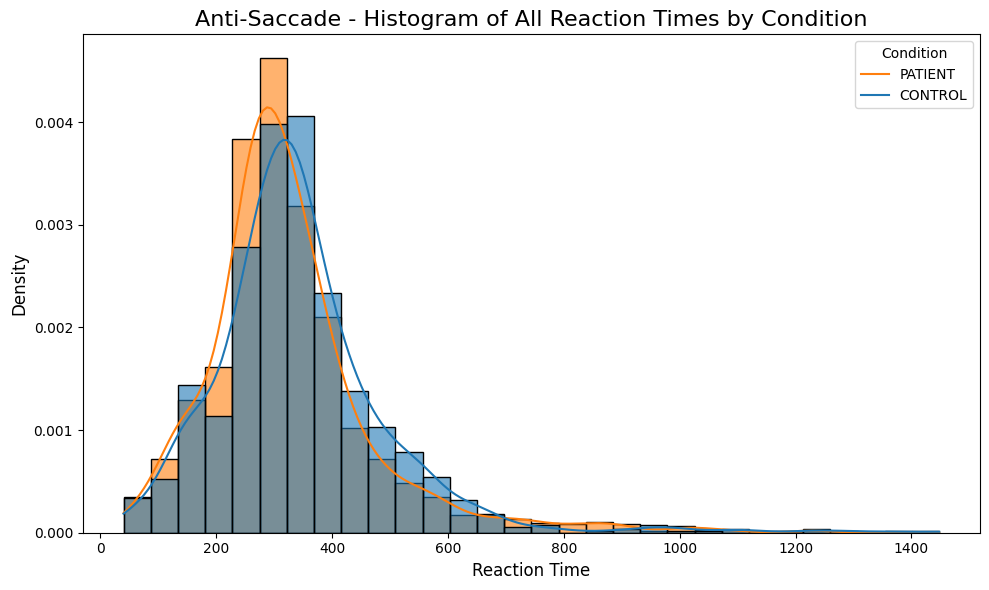

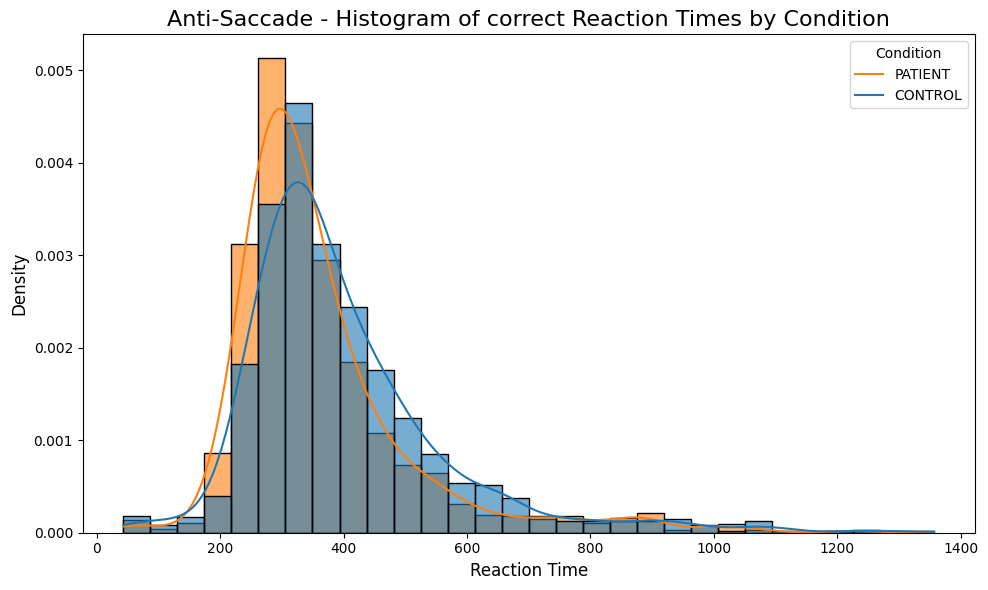

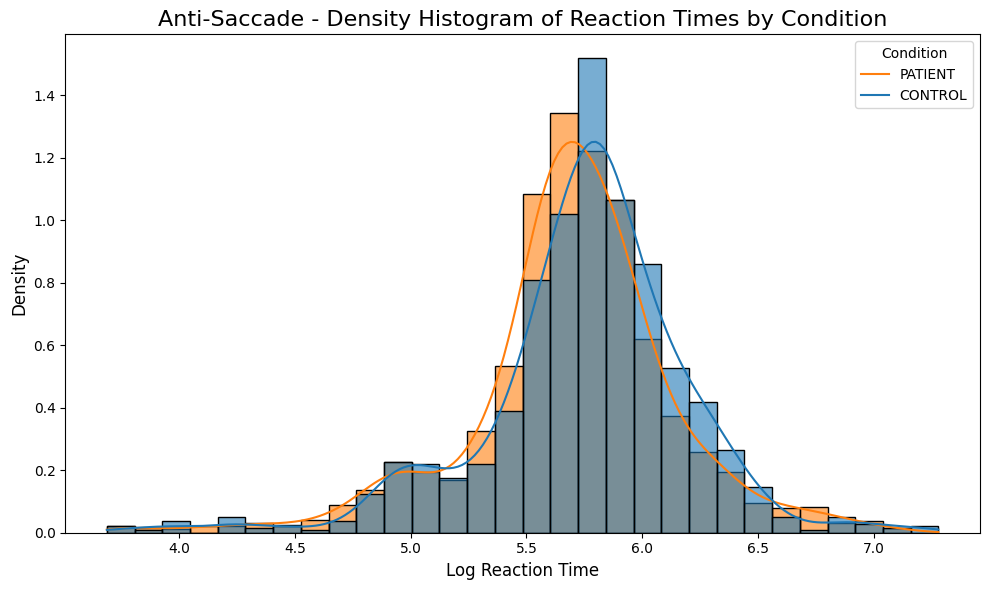

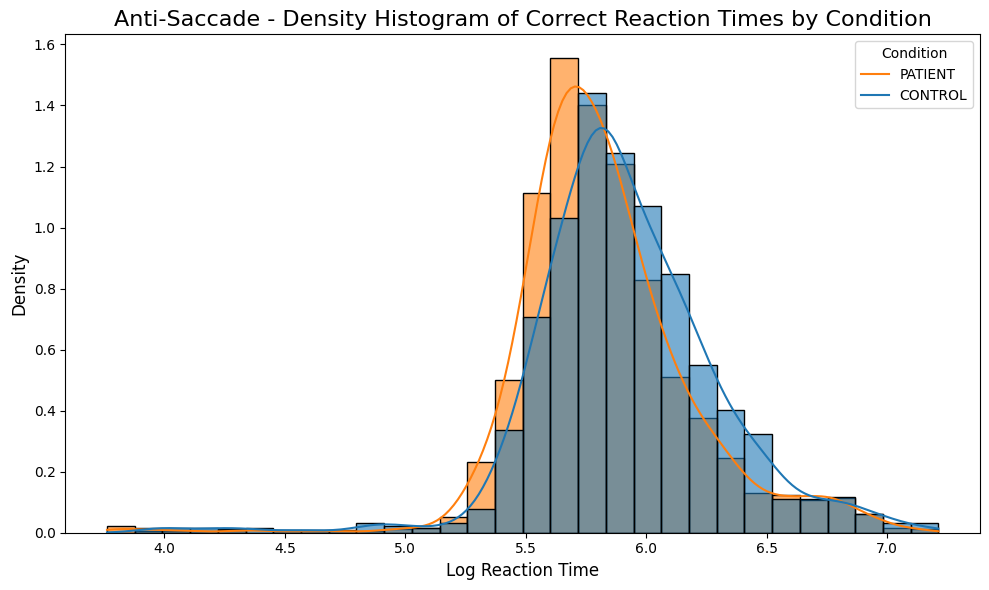

In [45]:
reaction_time['log_reaction_time'] = np.log(reaction_time['reaction_time'])
reaction_time_correct['log_reaction_time'] = np.log(reaction_time_correct['reaction_time'])


# Plot density histogram for all participants
plt.figure(figsize=(10, 6))
sns.histplot(
    data=reaction_time,
    x="reaction_time",
    hue="condition",
    kde=True,
    bins=30,
    alpha=0.6,
    stat="density",
    common_norm=False  # Ensure densities are not scaled together
)
plt.title("Anti-Saccade - Histogram of All Reaction Times by Condition", fontsize=16)
plt.xlabel("Reaction Time", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Condition", labels=reaction_time["condition"].unique())  # Ensure legend labels appear
plt.tight_layout()
plt.show()

# Plot density histogram for all participants
plt.figure(figsize=(10, 6))
sns.histplot(
    data=reaction_time_correct,
    x="reaction_time",
    hue="condition",
    kde=True,
    bins=30,
    alpha=0.6,
    stat="density",
    common_norm=False  # Ensure densities are not scaled together
)
plt.title("Anti-Saccade - Histogram of correct Reaction Times by Condition", fontsize=16)
plt.xlabel("Reaction Time", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Condition", labels=reaction_time["condition"].unique())  # Ensure legend labels appear
plt.tight_layout()
plt.show()


# Plot density histogram for all participants
plt.figure(figsize=(10, 6))
sns.histplot(
    data=reaction_time,
    x="log_reaction_time",
    hue="condition",
    kde=True,
    bins=30,
    alpha=0.6,
    stat="density",
    common_norm=False  # Ensure densities are not scaled together
)
plt.title("Anti-Saccade - Density Histogram of Reaction Times by Condition", fontsize=16)
plt.xlabel("Log Reaction Time", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Condition", labels=reaction_time["condition"].unique())  # Ensure legend labels appear
plt.tight_layout()
plt.show()

# Plot density histogram for correct reaction times only
plt.figure(figsize=(10, 6))
sns.histplot(
    data=reaction_time_correct,
    x="log_reaction_time",
    hue="condition",
    kde=True,
    bins=30,
    alpha=0.6,
    stat="density",
    common_norm=False  # Ensure densities are not scaled together
)
plt.title("Anti-Saccade - Density Histogram of Correct Reaction Times by Condition", fontsize=16)
plt.xlabel("Log Reaction Time", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Condition", labels=reaction_time_correct["condition"].unique())  # Ensure legend labels appear
plt.tight_layout()
plt.show()

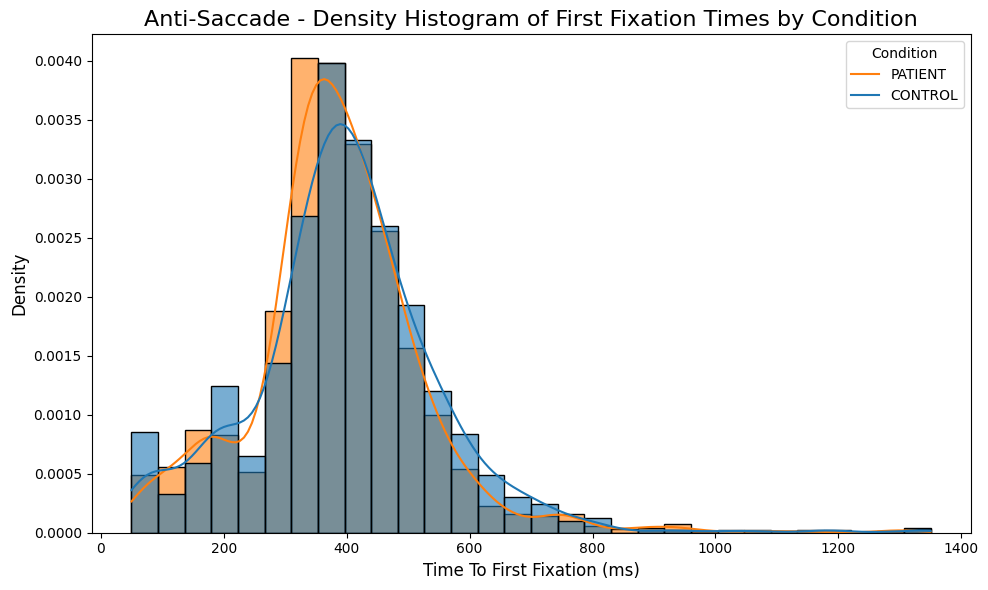

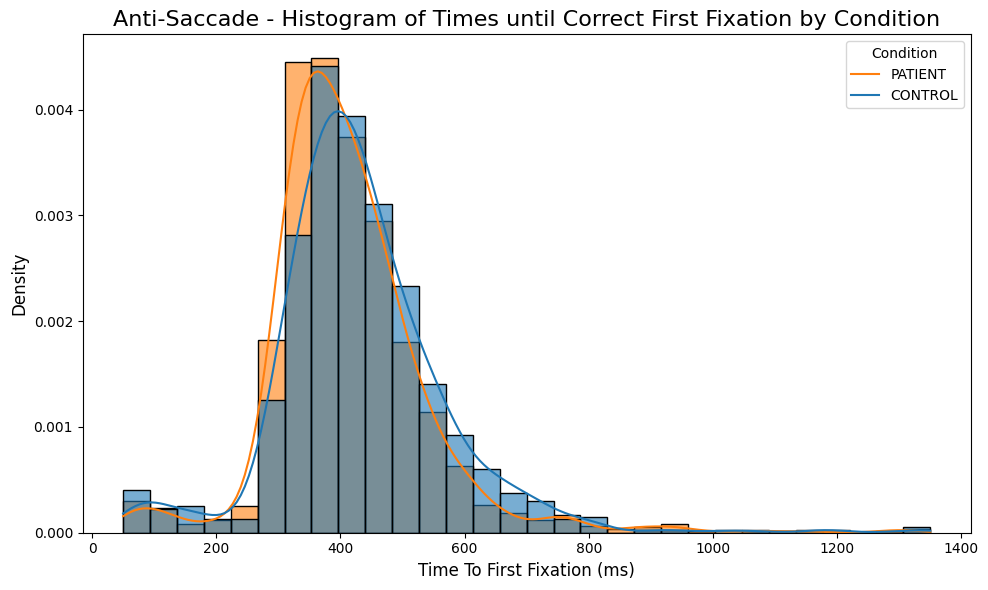

In [46]:
# Load first fixation data
first_fixation["condition"] = first_fixation["condition"].astype(str)
first_fixation_correct["condition"] = first_fixation_correct["condition"].astype(str)

# Plot density histogram for all participants
plt.figure(figsize=(10, 6))
sns.histplot(
    data=first_fixation,
    x="time_to_first_fixation",
    hue="condition",
    kde=True,
    bins=30,
    alpha=0.6,
    stat="density",
    common_norm=False
)
plt.title("Anti-Saccade - Density Histogram of First Fixation Times by Condition", fontsize=16)
plt.xlabel("Time To First Fixation (ms)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Condition", labels=reaction_time_correct["condition"].unique())
plt.tight_layout()
plt.show()

# Plot density histogram for correct first fixation times only
plt.figure(figsize=(10, 6))
sns.histplot(
    data=first_fixation_correct,
    x="time_to_first_fixation",
    hue="condition",
    kde=True,
    bins=30,
    alpha=0.6,
    stat="density",
    common_norm=False
)
plt.title("Anti-Saccade - Histogram of Times until Correct First Fixation by Condition", fontsize=16)
plt.xlabel("Time To First Fixation (ms)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Condition", labels=reaction_time_correct["condition"].unique())
plt.tight_layout()
plt.show()

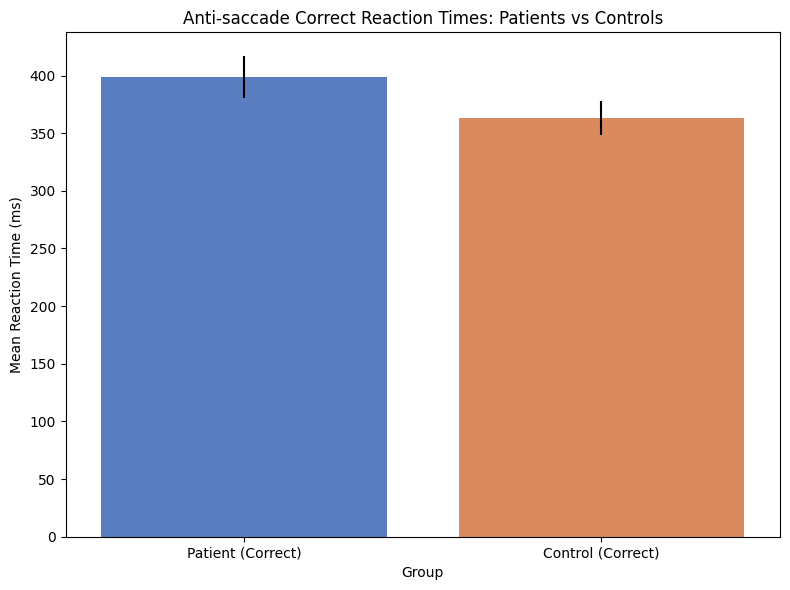

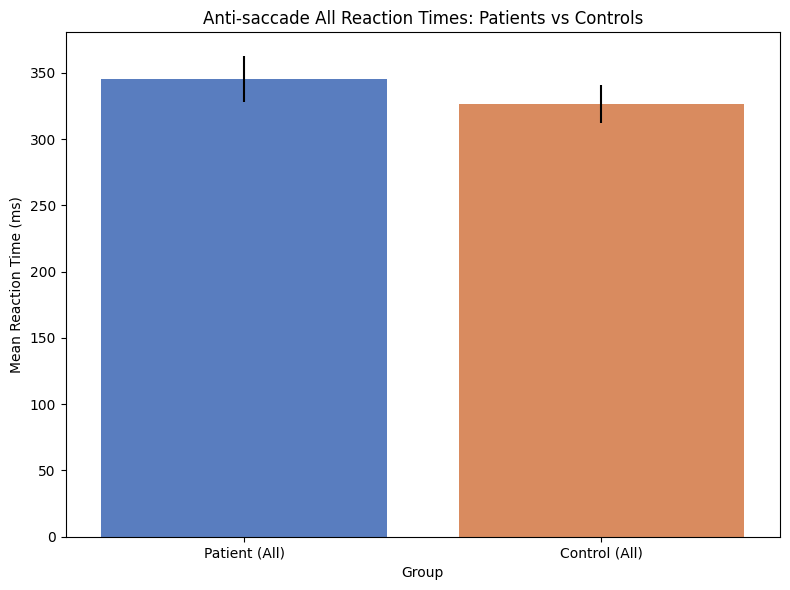

In [47]:
# Create summary statistics function
def summarize_reaction_times(df, label):
    n = df["participant_id"].nunique()  # Count unique participants
    mean_rt = df["reaction_time"].mean()
    sd = np.std(df["reaction_time"], ddof=1)
    se_rt = np.std(df["reaction_time"], ddof=1) / np.sqrt(n)  # Standard Error
    return {"group": label, "mean_rt": mean_rt, "sd": sd, "se_rt": se_rt, "n": n}

# Summarize for correct reaction times
correct_summary = pd.DataFrame([
    summarize_reaction_times(
        reaction_time_correct[reaction_time_correct["condition"] == "PATIENT"],
        "Patient (Correct)"
    ),
    summarize_reaction_times(
        reaction_time_correct[reaction_time_correct["condition"] == "CONTROL"],
        "Control (Correct)"
    )
])

# Summarize for all reaction times
all_summary = pd.DataFrame([
    summarize_reaction_times(
        reaction_time[reaction_time["condition"] == "PATIENT"],
        "Patient (All)"
    ),
    summarize_reaction_times(
        reaction_time[reaction_time["condition"] == "CONTROL"],
        "Control (All)"
    )
])

# Plot the first barplot: Correct Reaction Times
plt.figure(figsize=(8, 6))
sns.barplot(
    data=correct_summary, 
    x="group", 
    y="mean_rt", 
    yerr=correct_summary["se_rt"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Correct Reaction Times: Patients vs Controls")
plt.ylabel("Mean Reaction Time (ms)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

# Plot the second barplot: All Reaction Times
plt.figure(figsize=(8, 6))
sns.barplot(
    data=all_summary, 
    x="group", 
    y="mean_rt", 
    yerr=all_summary["se_rt"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade All Reaction Times: Patients vs Controls")
plt.ylabel("Mean Reaction Time (ms)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

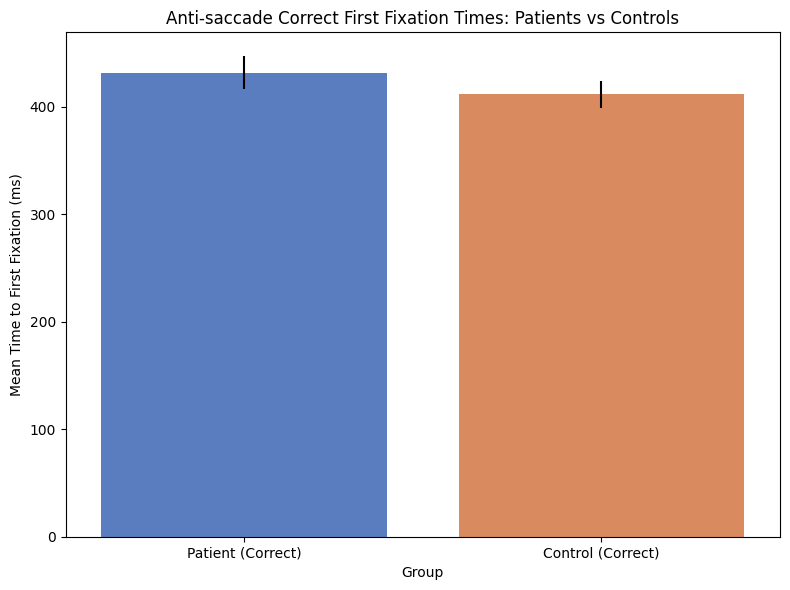

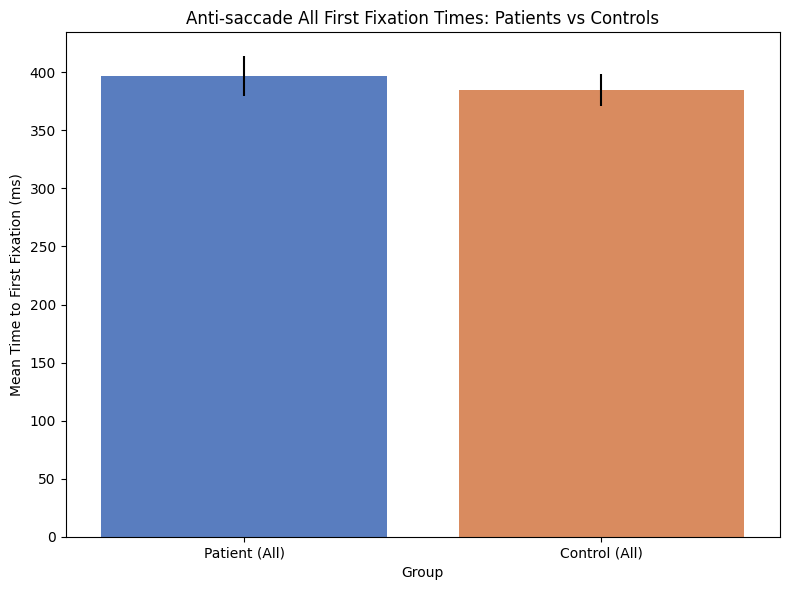

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create summary statistics function
def summarize_fixation_times(df, label):
    n = len(df["participant_id"].unique())  # Count unique participants
    mean_ft = df["time_to_first_fixation"].mean()
    sd = np.std(df["time_to_first_fixation"], ddof=1)
    se_ft = np.std(df["time_to_first_fixation"], ddof=1) / np.sqrt(n)  # Standard Error
    return {"group": label, "mean_ft": mean_ft, "sd": sd, "se_ft": se_ft, "n": n}

# Summarize for the first barplot (correct first fixation times)
correct_summary = pd.DataFrame([
    summarize_fixation_times(
        first_fixation_correct[first_fixation_correct["condition"] == "PATIENT"],
        "Patient (Correct)"
    ),
    summarize_fixation_times(
        first_fixation_correct[first_fixation_correct["condition"] == "CONTROL"],
        "Control (Correct)"
    )
])

# Summarize for the second barplot (all first fixation times)
all_summary = pd.DataFrame([
    summarize_fixation_times(
        first_fixation[first_fixation["condition"] == "PATIENT"],
        "Patient (All)"
    ),
    summarize_fixation_times(
        first_fixation[first_fixation["condition"] == "CONTROL"],
        "Control (All)"
    )
])

# Plot the first barplot: Correct First Fixation Times
plt.figure(figsize=(8, 6))
sns.barplot(
    data=correct_summary, 
    x="group", 
    y="mean_ft", 
    yerr=correct_summary["se_ft"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Correct First Fixation Times: Patients vs Controls")
plt.ylabel("Mean Time to First Fixation (ms)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

# Plot the second barplot: All First Fixation Times
plt.figure(figsize=(8, 6))
sns.barplot(
    data=all_summary, 
    x="group", 
    y="mean_ft", 
    yerr=all_summary["se_ft"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade All First Fixation Times: Patients vs Controls")
plt.ylabel("Mean Time to First Fixation (ms)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

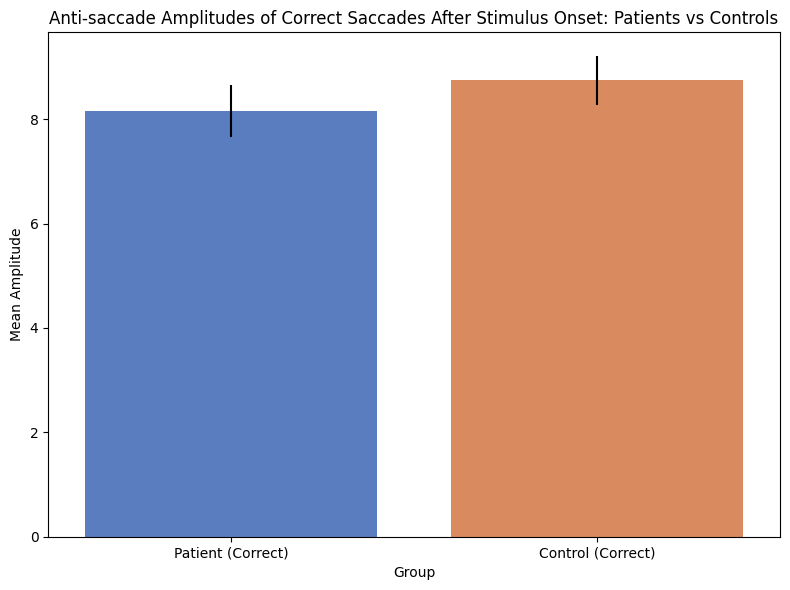

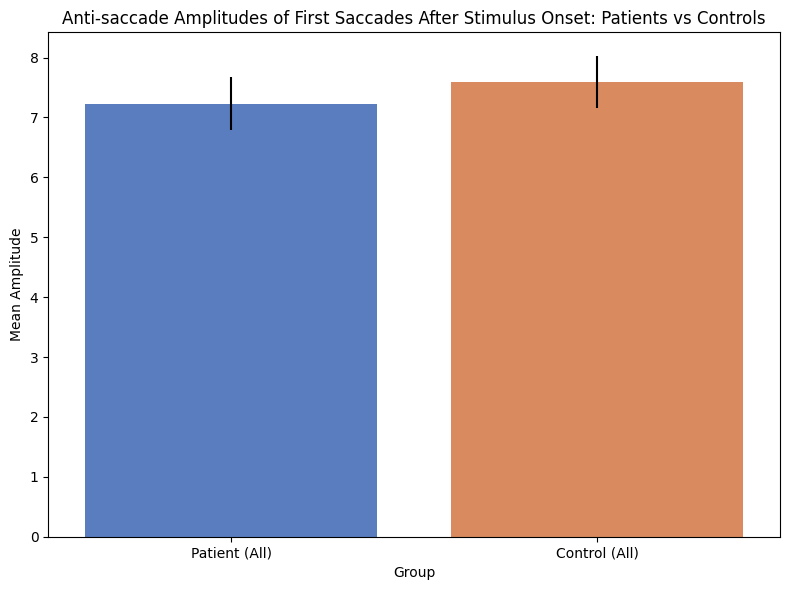

In [49]:

# Create summary statistics function for amplitudes
def summarize_amplitudes(df, label):
    n = df["participant_id"].nunique()  # Count unique participants
    mean_amp = df["amplitude"].mean()
    sd = np.std(df["amplitude"], ddof=1)
    se_amp = np.std(df["amplitude"], ddof=1) / np.sqrt(n)  # Standard Error
    return {"group": label, "mean_amp": mean_amp, "sd": sd, "se_amp": se_amp, "n": n}

# Summarize for correct amplitudes
correct_amp_summary = pd.DataFrame([
    summarize_amplitudes(
        reaction_time_correct[reaction_time_correct["condition"] == "PATIENT"],
        "Patient (Correct)"
    ),
    summarize_amplitudes(
        reaction_time_correct[reaction_time_correct["condition"] == "CONTROL"],
        "Control (Correct)"
    )
])

# Summarize for all amplitudes
all_amp_summary = pd.DataFrame([
    summarize_amplitudes(
        reaction_time[reaction_time["condition"] == "PATIENT"],
        "Patient (All)"
    ),
    summarize_amplitudes(
        reaction_time[reaction_time["condition"] == "CONTROL"],
        "Control (All)"
    )
])

# Plot the first barplot: Correct Amplitudes
plt.figure(figsize=(8, 6))
sns.barplot(
    data=correct_amp_summary, 
    x="group", 
    y="mean_amp", 
    yerr=correct_amp_summary["se_amp"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Amplitudes of Correct Saccades After Stimulus Onset: Patients vs Controls")
plt.ylabel("Mean Amplitude")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

# Plot the second barplot: All Amplitudes
plt.figure(figsize=(8, 6))
sns.barplot(
    data=all_amp_summary, 
    x="group", 
    y="mean_amp", 
    yerr=all_amp_summary["se_amp"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Amplitudes of First Saccades After Stimulus Onset: Patients vs Controls")
plt.ylabel("Mean Amplitude")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

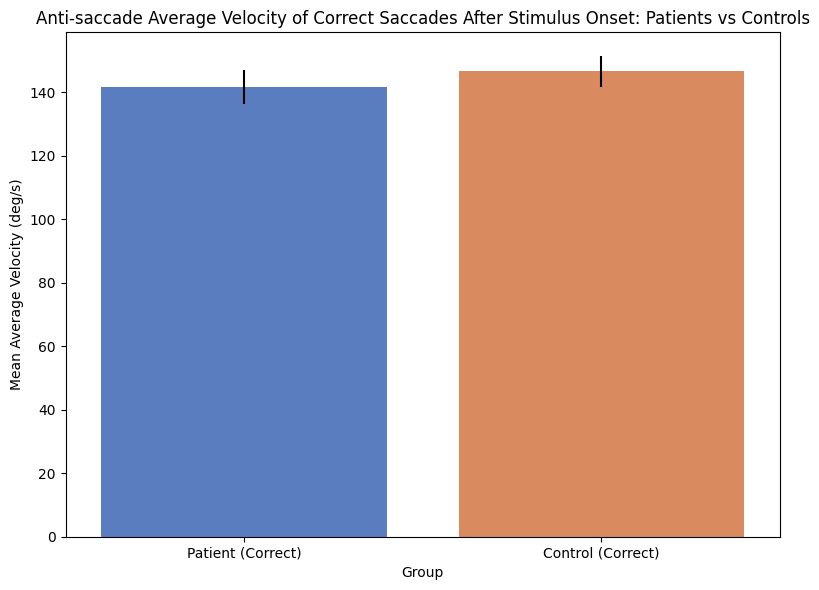

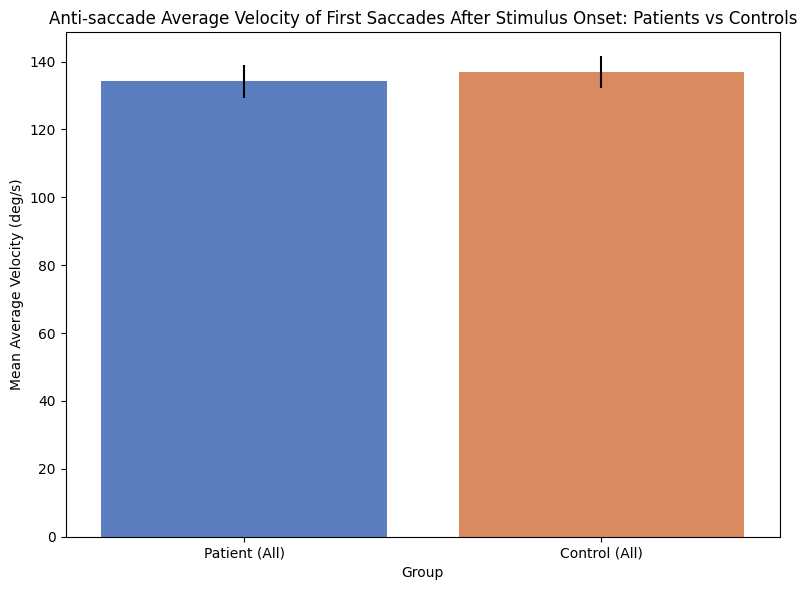

In [50]:
# Create summary statistics function for average velocity
def summarize_velocity(df, label):
    n = df["participant_id"].nunique()  # Count unique participants
    mean_velocity = df["average_velocity"].mean()
    sd = np.std(df["average_velocity"], ddof=1)
    se_velocity = np.std(df["average_velocity"], ddof=1) / np.sqrt(n)  # Standard Error
    return {"group": label, "mean_velocity": mean_velocity, "sd": sd, "se_velocity": se_velocity, "n": n}

# Summarize for correct average velocity
correct_velocity_summary = pd.DataFrame([
    summarize_velocity(
        reaction_time_correct[reaction_time_correct["condition"] == "PATIENT"],
        "Patient (Correct)"
    ),
    summarize_velocity(
        reaction_time_correct[reaction_time_correct["condition"] == "CONTROL"],
        "Control (Correct)"
    )
])

# Summarize for all average velocity
all_velocity_summary = pd.DataFrame([
    summarize_velocity(
        reaction_time[reaction_time["condition"] == "PATIENT"],
        "Patient (All)"
    ),
    summarize_velocity(
        reaction_time[reaction_time["condition"] == "CONTROL"],
        "Control (All)"
    )
])

# Plot the first barplot: Correct Average Velocity
plt.figure(figsize=(8, 6))
sns.barplot(
    data=correct_velocity_summary, 
    x="group", 
    y="mean_velocity", 
    yerr=correct_velocity_summary["se_velocity"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Average Velocity of Correct Saccades After Stimulus Onset: Patients vs Controls")
plt.ylabel("Mean Average Velocity (deg/s)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

# Plot the second barplot: All Average Velocity
plt.figure(figsize=(8, 6))
sns.barplot(
    data=all_velocity_summary, 
    x="group", 
    y="mean_velocity", 
    yerr=all_velocity_summary["se_velocity"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Average Velocity of First Saccades After Stimulus Onset: Patients vs Controls")
plt.ylabel("Mean Average Velocity (deg/s)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

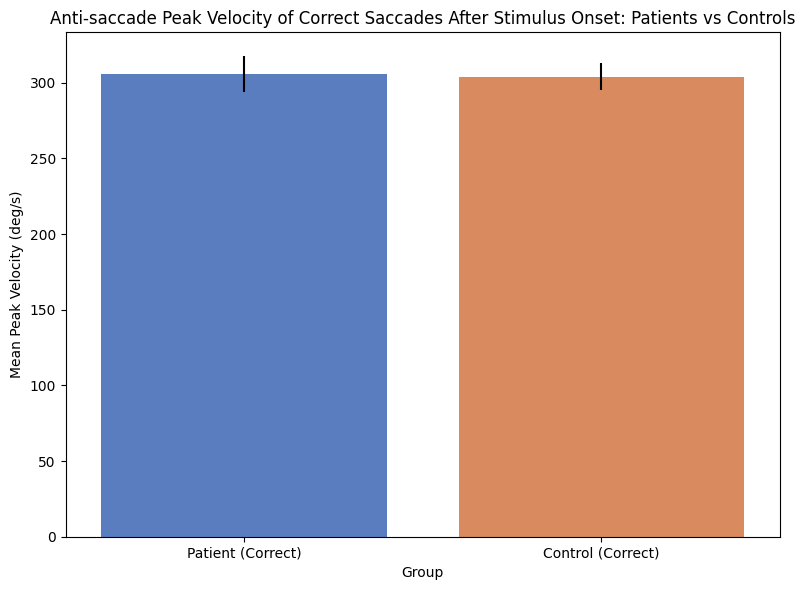

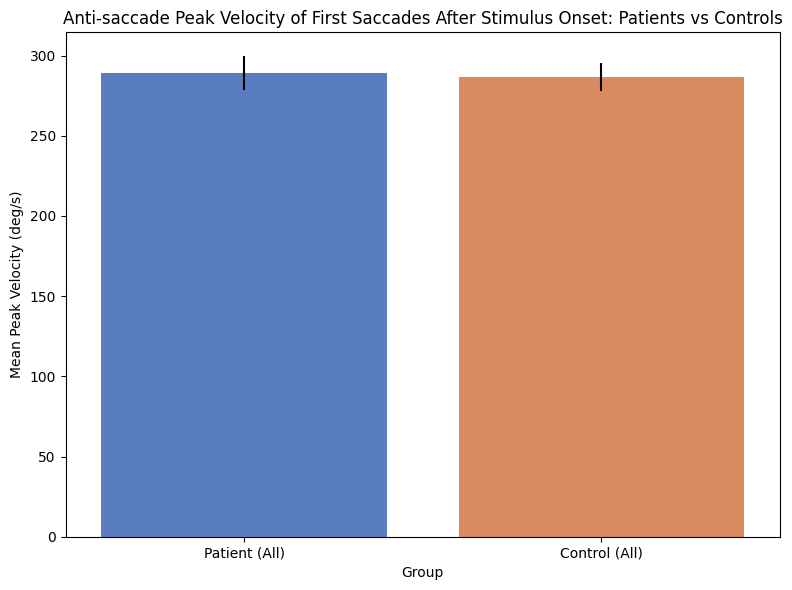

In [51]:
# Create summary statistics function for peak velocity
def summarize_peak_velocity(df, label):
    n = df["participant_id"].nunique()  # Count unique participants
    mean_peak_velocity = df["peak_velocity"].mean()
    sd = np.std(df["peak_velocity"], ddof=1)
    se_peak_velocity = np.std(df["peak_velocity"], ddof=1) / np.sqrt(n)  # Standard Error
    return {"group": label, "mean_peak_velocity": mean_peak_velocity, "sd": sd, "se_peak_velocity": se_peak_velocity, "n": n}

# Summarize for correct peak velocity
correct_peak_velocity_summary = pd.DataFrame([
    summarize_peak_velocity(
        reaction_time_correct[reaction_time_correct["condition"] == "PATIENT"],
        "Patient (Correct)"
    ),
    summarize_peak_velocity(
        reaction_time_correct[reaction_time_correct["condition"] == "CONTROL"],
        "Control (Correct)"
    )
])

# Summarize for all peak velocity
all_peak_velocity_summary = pd.DataFrame([
    summarize_peak_velocity(
        reaction_time[reaction_time["condition"] == "PATIENT"],
        "Patient (All)"
    ),
    summarize_peak_velocity(
        reaction_time[reaction_time["condition"] == "CONTROL"],
        "Control (All)"
    )
])

# Plot the first barplot: Correct Peak Velocity
plt.figure(figsize=(8, 6))
sns.barplot(
    data=correct_peak_velocity_summary, 
    x="group", 
    y="mean_peak_velocity", 
    yerr=correct_peak_velocity_summary["se_peak_velocity"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Peak Velocity of Correct Saccades After Stimulus Onset: Patients vs Controls")
plt.ylabel("Mean Peak Velocity (deg/s)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

# Plot the second barplot: All Peak Velocity
plt.figure(figsize=(8, 6))
sns.barplot(
    data=all_peak_velocity_summary, 
    x="group", 
    y="mean_peak_velocity", 
    yerr=all_peak_velocity_summary["se_peak_velocity"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Peak Velocity of First Saccades After Stimulus Onset: Patients vs Controls")
plt.ylabel("Mean Peak Velocity (deg/s)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

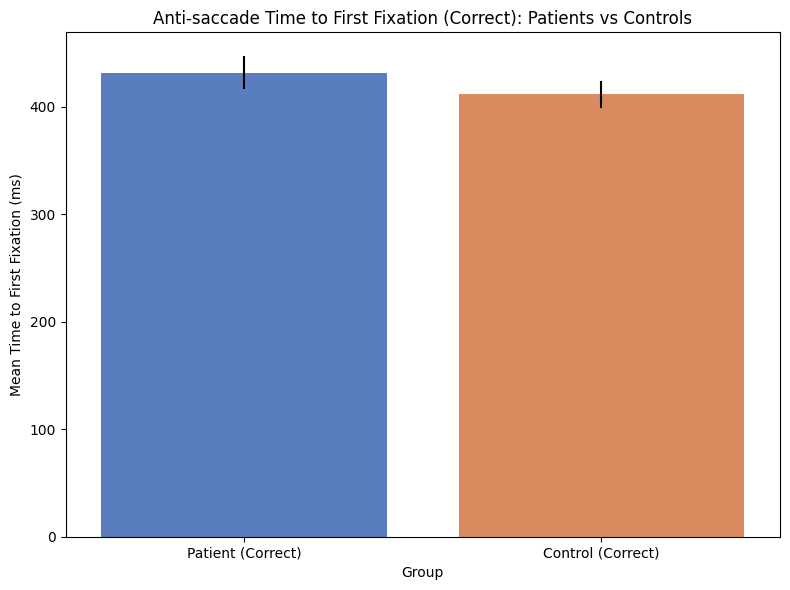

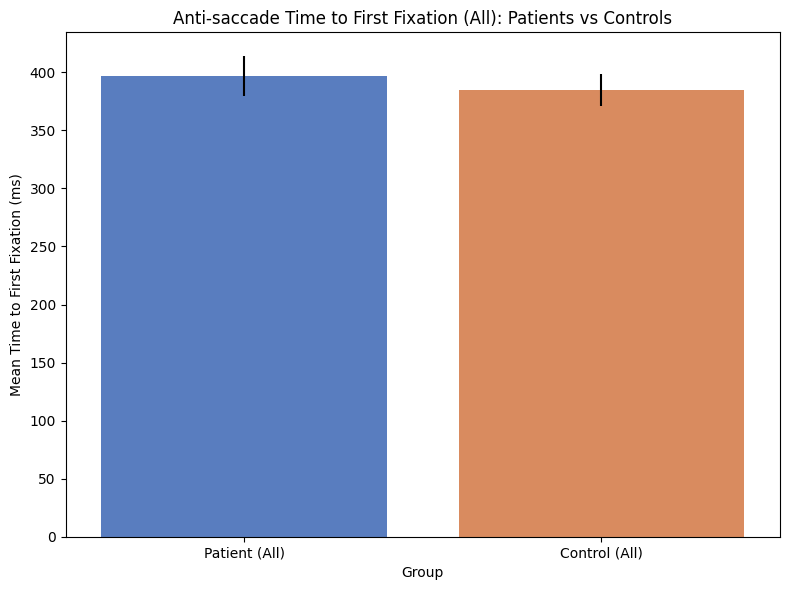

In [52]:
# Create summary statistics function for time to first fixation
def summarize_time_to_first_fixation(df, label):
    n = df["participant_id"].nunique()  # Count unique participants
    mean_time = df["time_to_first_fixation"].mean()
    sd = np.std(df["time_to_first_fixation"], ddof=1)
    se_time = sd / np.sqrt(n)  # Standard Error
    return {"group": label, "mean_time": mean_time, "sd": sd, "se_time": se_time, "n": n}

# Summarize for correct time to first fixation
correct_summary = pd.DataFrame([
    summarize_time_to_first_fixation(
        first_fixation_correct[first_fixation_correct["condition"] == "PATIENT"],
        "Patient (Correct)"
    ),
    summarize_time_to_first_fixation(
        first_fixation_correct[first_fixation_correct["condition"] == "CONTROL"],
        "Control (Correct)"
    )
])

# Summarize for all time to first fixation
all_summary = pd.DataFrame([
    summarize_time_to_first_fixation(
        first_fixation[first_fixation["condition"] == "PATIENT"],
        "Patient (All)"
    ),
    summarize_time_to_first_fixation(
        first_fixation[first_fixation["condition"] == "CONTROL"],
        "Control (All)"
    )
])

# Plot the first barplot: Correct Time to First Fixation
plt.figure(figsize=(8, 6))
sns.barplot(
    data=correct_summary, 
    x="group", 
    y="mean_time", 
    yerr=correct_summary["se_time"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Time to First Fixation (Correct): Patients vs Controls")
plt.ylabel("Mean Time to First Fixation (ms)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

# Plot the second barplot: All Time to First Fixation
plt.figure(figsize=(8, 6))
sns.barplot(
    data=all_summary, 
    x="group", 
    y="mean_time", 
    yerr=all_summary["se_time"], 
    capsize=0.2, 
    palette="muted"
)
plt.title("Anti-saccade Time to First Fixation (All): Patients vs Controls")
plt.ylabel("Mean Time to First Fixation (ms)")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

In [53]:
from scipy.stats import ttest_ind

# Reaction Time: Correct
stat_reaction_correct, pval_reaction_correct = ttest_ind(
    reaction_time_correct[reaction_time_correct["condition"] == "PATIENT"]["log_reaction_time"], 
    reaction_time_correct[reaction_time_correct["condition"] == "CONTROL"]["log_reaction_time"], 
    equal_var=False
)
print(f"Reaction Time (Correct): t-statistic = {stat_reaction_correct:.4f}, p-value = {pval_reaction_correct:.4f}")

# Reaction Time: All
stat_reaction_all, pval_reaction_all = ttest_ind(
    reaction_time[reaction_time["condition"] == "PATIENT"]["log_reaction_time"], 
    reaction_time[reaction_time["condition"] == "CONTROL"]["log_reaction_time"], 
    equal_var=False
)
print(f"Reaction Time (All): t-statistic = {stat_reaction_all:.4f}, p-value = {pval_reaction_all:.4f}")

# Amplitude: All
stat_amplitude_all, pval_amplitude_all = ttest_ind(
    reaction_time[reaction_time["condition"] == "PATIENT"]["amplitude"], 
    reaction_time[reaction_time["condition"] == "CONTROL"]["amplitude"], 
    equal_var=False
)
print(f"Amplitude (All): t-statistic = {stat_amplitude_all:.4f}, p-value = {pval_amplitude_all:.4f}")

# Amplitude: Correct
stat_amplitude_correct, pval_amplitude_correct = ttest_ind(
    reaction_time_correct[reaction_time_correct["condition"] == "PATIENT"]["amplitude"], 
    reaction_time_correct[reaction_time_correct["condition"] == "CONTROL"]["amplitude"], 
    equal_var=False
)
print(f"Amplitude (Correct): t-statistic = {stat_amplitude_correct:.4f}, p-value = {pval_amplitude_correct:.4f}")

# Peak Velocity: All
stat_peak_velocity_all, pval_peak_velocity_all = ttest_ind(
    reaction_time[reaction_time["condition"] == "PATIENT"]["peak_velocity"], 
    reaction_time[reaction_time["condition"] == "CONTROL"]["peak_velocity"], 
    equal_var=False
)
print(f"Peak Velocity (All): t-statistic = {stat_peak_velocity_all:.4f}, p-value = {pval_peak_velocity_all:.4f}")

# Peak Velocity: Correct
stat_peak_velocity_correct, pval_peak_velocity_correct = ttest_ind(
    reaction_time_correct[reaction_time_correct["condition"] == "PATIENT"]["peak_velocity"], 
    reaction_time_correct[reaction_time_correct["condition"] == "CONTROL"]["peak_velocity"], 
    equal_var=False
)
print(f"Peak Velocity (Correct): t-statistic = {stat_peak_velocity_correct:.4f}, p-value = {pval_peak_velocity_correct:.4f}")

# Average Velocity: All
stat_avg_velocity_all, pval_avg_velocity_all = ttest_ind(
    reaction_time[reaction_time["condition"] == "PATIENT"]["average_velocity"], 
    reaction_time[reaction_time["condition"] == "CONTROL"]["average_velocity"], 
    equal_var=False
)
print(f"Average Velocity (All): t-statistic = {stat_avg_velocity_all:.4f}, p-value = {pval_avg_velocity_all:.4f}")

# Average Velocity: Correct
stat_avg_velocity_correct, pval_avg_velocity_correct = ttest_ind(
    reaction_time_correct[reaction_time_correct["condition"] == "PATIENT"]["average_velocity"], 
    reaction_time_correct[reaction_time_correct["condition"] == "CONTROL"]["average_velocity"], 
    equal_var=False
)
print(f"Average Velocity (Correct): t-statistic = {stat_avg_velocity_correct:.4f}, p-value = {pval_avg_velocity_correct:.4f}")

# Time to First Fixation: All
stat_time_to_fixation_all, pval_time_to_fixation_all = ttest_ind(
    first_fixation[first_fixation["condition"] == "PATIENT"]["time_to_first_fixation"], 
    first_fixation[first_fixation["condition"] == "CONTROL"]["time_to_first_fixation"], 
    equal_var=False
)
print(f"Time to First Fixation (All): t-statistic = {stat_time_to_fixation_all:.4f}, p-value = {pval_time_to_fixation_all:.4f}")

# Time to First Fixation: Correct
stat_time_to_fixation_correct, pval_time_to_fixation_correct = ttest_ind(
    first_fixation_correct[first_fixation_correct["condition"] == "PATIENT"]["time_to_first_fixation"], 
    first_fixation_correct[first_fixation_correct["condition"] == "CONTROL"]["time_to_first_fixation"], 
    equal_var=False
)
print(f"Time to First Fixation (Correct): t-statistic = {stat_time_to_fixation_correct:.4f}, p-value = {pval_time_to_fixation_correct:.4f}")

Reaction Time (Correct): t-statistic = 5.9496, p-value = 0.0000
Reaction Time (All): t-statistic = 3.3420, p-value = 0.0008
Amplitude (All): t-statistic = -2.2298, p-value = 0.0258
Amplitude (Correct): t-statistic = -3.2254, p-value = 0.0013
Peak Velocity (All): t-statistic = 0.6277, p-value = 0.5302
Peak Velocity (Correct): t-statistic = 0.4658, p-value = 0.6414
Average Velocity (All): t-statistic = -1.5618, p-value = 0.1185
Average Velocity (Correct): t-statistic = -2.6158, p-value = 0.0090
Time to First Fixation (All): t-statistic = 2.1266, p-value = 0.0336
Time to First Fixation (Correct): t-statistic = 3.5200, p-value = 0.0004


In [54]:
import statsmodels.api as sm

# Encode the group variable: 0 for Control, 1 for Patient
reaction_time["group_encoded"] = reaction_time["condition"].apply(lambda x: 1 if x == "PATIENT" else 0)

# Define independent (group) and dependent (reaction_time) variables
X = sm.add_constant(reaction_time["group_encoded"])  # Add a constant term for the intercept
y = reaction_time["reaction_time"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

# Save the summary to a text file (optional)
with open("reaction_time_regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:          reaction_time   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.27
Date:                Fri, 21 Feb 2025   Prob (F-statistic):            0.00137
Time:                        18:44:30   Log-Likelihood:                -17598.
No. Observations:                2733   AIC:                         3.520e+04
Df Residuals:                    2731   BIC:                         3.521e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           326.4059      3.794     86.038

In [55]:
# Define independent (group) and dependent (reaction_time) variables
X = sm.add_constant(reaction_time["group_encoded"])  # Add a constant term for the intercept
y = reaction_time["log_reaction_time"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

# Save the summary to a text file (optional)
with open("reaction_time_regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:      log_reaction_time   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.17
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           0.000842
Time:                        18:44:33   Log-Likelihood:                -1691.9
No. Observations:                2733   AIC:                             3388.
Df Residuals:                    2731   BIC:                             3400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6926      0.011    505.565

In [56]:
reaction_time_correct["group_encoded"] = reaction_time_correct["condition"].apply(lambda x: 1 if x == "PATIENT" else 0)

# Define independent (group) and dependent (reaction_time) variables
X = sm.add_constant(reaction_time_correct["group_encoded"])  
y = reaction_time_correct["reaction_time"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

# Save the summary to a text file (optional)
with open("reaction_time_regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:          reaction_time   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     32.30
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.47e-08
Time:                        18:44:35   Log-Likelihood:                -17058.
No. Observations:                2636   AIC:                         3.412e+04
Df Residuals:                    2634   BIC:                         3.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           363.3527      3.998     90.892

In [57]:
reaction_time_correct["group_encoded"] = reaction_time_correct["condition"].apply(lambda x: 1 if x == "PATIENT" else 0)

# Define independent (group) and dependent (reaction_time) variables
X = sm.add_constant(reaction_time_correct["group_encoded"])  # Add a constant term for the intercept
y = reaction_time_correct["log_reaction_time"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

# Save the summary to a text file (optional)
with open("reaction_time_regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:      log_reaction_time   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     36.01
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.24e-09
Time:                        18:44:37   Log-Likelihood:                -1131.1
No. Observations:                2636   AIC:                             2266.
Df Residuals:                    2634   BIC:                             2278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.8269      0.010    613.252